 # Game of Thrones 13th April-30th May

##### TweetScraper  is built on Scrapy without using Twitter's APIs. The crawled data is not as clean as the one obtained by the APIs

#### In the root folder i ran (scrapy crawl TweetScraper -a query=""#GameOfThrones" lang:en until:2019-05-30 since:2019-04-13")

#### where query is a list of keywords that we  want to search in Twitter Search. TweetScraper will crawl the search results of the query and save the tweet content and user information

#### we are scraping only the english texts 

In [1]:
import pandas as pd
import numpy as np 
import string
import re

#nltk

import nltk
from nltk.corpus import stopwords
from nltk import PorterStemmer as stemmer
from nltk.tokenize import word_tokenize
from nltk import download, FreqDist, WordNetLemmatizer
from nltk.tokenize.regexp import wordpunct_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

from collections import Counter 
from datetime import datetime
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 

#gensim

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

#sklearn

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

#visualization

from matplotlib import rcParams
import matplotlib.pyplot as plt
import seaborn as sns

lemmatizer = WordNetLemmatizer() 
ps=stemmer()

In [2]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)  

In [3]:
%cd Desktop

C:\Users\VIJESH\Desktop


#### i manually combined all the file of my scraped using the comment "df.append(pd.read_table(file))", so i have all the data in a single cell


In [4]:
df=pd.read_csv("Tweet.csv")

In [5]:
df.head()

,tweet
0,"Empty DataFrame\nColumns: [{""usernameTweet"": ""Ryanair"", ""ID"": ""1131497916663783424"", ""text"": ""A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF"", ""url"": ""/Ryanair/status/1131497916663783424"", ""nbr_retweet"": 5, ""nbr_favorite"": 60, ""nbr_reply"": 2, ""datetime"": ""2019-05-23 15:21:40"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""1542862735""}]\nIndex: []"
1,"Empty DataFrame\nColumns: [{""usernameTweet"": ""sachintrivedig"", ""ID"": ""1131497948922040320"", ""text"": ""'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …"", ""url"": ""/sachintrivedig/status/1131497948922040320"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:21:47"", ""has_media"": true, ""medias"": [""https://t.co/3PFXzP8HBe""], ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""1356262172""}]\nIndex: []"
2,"Empty DataFrame\nColumns: [{""usernameTweet"": ""SherwinLLewis"", ""ID"": ""1131498045697384448"", ""text"": ""Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones"", ""url"": ""/SherwinLLewis/status/1131498045697384448"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:22:10"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""1260340831""}]\nIndex: []"
3,"Empty DataFrame\nColumns: [{""usernameTweet"": ""temperance8"", ""ID"": ""1131498066773762049"", ""text"": ""I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp"", ""url"": ""/temperance8/status/1131498066773762049"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:22:15"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""277148437""}]\nIndex: []"
4,"Empty DataFrame\nColumns: [{""usernameTweet"": ""freefolkbot"", ""ID"": ""1131498080531046400"", ""text"": ""We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei"", ""url"": ""/freefolkbot/status/1131498080531046400"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:22:19"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""999812247294791680""}]\nIndex: []"


In [6]:

user_name=[]
text=[]
re_tweet=[]
fav=[]
reply=[]
time=[]
def clean(row):
    tweet=row['tweet']
    a=tweet.split("Empty DataFrame\nColumns:") #removing unneccesary words
    b=(a[1:])
    c=' '.join(b)
    b=c.split('"ID":')
    
    name=b[0].split(":")
    
    user_name.append(name[1]) #saving name in a list
    
    e=b[1].split('"text":')
    texts=e[1].split('"url":')
    
    text.append(texts[0])      #saving tweets in different list
    
    f=texts[1].split('"nbr_retweet"')
    retweet=f[1].split('"nbr_favorite"') 
    
    re_tweet.append(retweet[0])         #saving retweets in a list
    
    favourite=retweet[1].split('"nbr_reply":')
    
    fav.append(favourite[0])             #saving favourite in a list
    
    rep=favourite[1].split(' "datetime":') 
    
    reply.append(rep[0])                 #saving reply in a list
    
    date_time=rep[1].split(',')
    
    time.append(date_time[0])             #saving time in a list

In [7]:
df.apply(lambda row:clean(row),axis=1)


0        None
1        None
2        None
3        None
4        None
         ... 
39234    None
39235    None
39236    None
39237    None
39238    None
Length: 39239, dtype: object

In [8]:
df.head()

,tweet
0,"Empty DataFrame\nColumns: [{""usernameTweet"": ""Ryanair"", ""ID"": ""1131497916663783424"", ""text"": ""A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF"", ""url"": ""/Ryanair/status/1131497916663783424"", ""nbr_retweet"": 5, ""nbr_favorite"": 60, ""nbr_reply"": 2, ""datetime"": ""2019-05-23 15:21:40"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""1542862735""}]\nIndex: []"
1,"Empty DataFrame\nColumns: [{""usernameTweet"": ""sachintrivedig"", ""ID"": ""1131497948922040320"", ""text"": ""'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …"", ""url"": ""/sachintrivedig/status/1131497948922040320"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:21:47"", ""has_media"": true, ""medias"": [""https://t.co/3PFXzP8HBe""], ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""1356262172""}]\nIndex: []"
2,"Empty DataFrame\nColumns: [{""usernameTweet"": ""SherwinLLewis"", ""ID"": ""1131498045697384448"", ""text"": ""Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones"", ""url"": ""/SherwinLLewis/status/1131498045697384448"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:22:10"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""1260340831""}]\nIndex: []"
3,"Empty DataFrame\nColumns: [{""usernameTweet"": ""temperance8"", ""ID"": ""1131498066773762049"", ""text"": ""I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp"", ""url"": ""/temperance8/status/1131498066773762049"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:22:15"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""277148437""}]\nIndex: []"
4,"Empty DataFrame\nColumns: [{""usernameTweet"": ""freefolkbot"", ""ID"": ""1131498080531046400"", ""text"": ""We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei"", ""url"": ""/freefolkbot/status/1131498080531046400"", ""nbr_retweet"": 0, ""nbr_favorite"": 0, ""nbr_reply"": 0, ""datetime"": ""2019-05-23 15:22:19"", ""is_reply"": false, ""is_retweet"": false, ""user_id"": ""999812247294791680""}]\nIndex: []"


In [9]:
len(df)

39239

## creating a dataframe

In [10]:

d={'user':user_name}  

data=pd.DataFrame.from_dict(d)

In [11]:
data['text']=text
data['re_tweet']=re_tweet
data['fav']=fav
data['reply']=reply
data['time']=time

In [12]:
data.head()

,user,text,re_tweet,fav,reply,time
0,"""Ryanair"",","""A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF"",",": 5,",": 60,","2,","""2019-05-23 15:21:40"""
1,"""sachintrivedig"",","""'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …"",",": 0,",": 0,","0,","""2019-05-23 15:21:47"""
2,"""SherwinLLewis"",","""Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones"",",": 0,",": 0,","0,","""2019-05-23 15:22:10"""
3,"""temperance8"",","""I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp"",",": 0,",": 0,","0,","""2019-05-23 15:22:15"""
4,"""freefolkbot"",","""We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei"",",": 0,",": 0,","0,","""2019-05-23 15:22:19"""


## Function to remove all punctuation

In [13]:
def remove_punct(word):
    punct=string.punctuation
    word =[letter for letter in word if letter not in punct] 
    d=''.join(word)
    return(d)
    

## Function to remove all punctuation and convert it into float

In [14]:
def remove_punct_int(word):
    punct=string.punctuation
    word=[letter for letter in word if letter not in punct] 
    number=''.join(word)
    return(float(number))

## Function to split date from data-time

In [15]:
def date(date_time):
    date=date_time.strip().split(" ")
    return(datetime.strptime(date[0],'"%Y-%m-%d').date())

## Function to split hour from data-time

In [16]:
def sep_hour(date_time):
    date=date_time.strip()
    date_=date.split(" ")
    hour=date_[1].split(':')
    return(float(hour[0]))

In [17]:
data['date']=data.apply(lambda row:date(row['time']),axis=1) #seperates date from the datetime

In [18]:
data['hour']=data.apply(lambda row:sep_hour(row['time']),axis=1) #seperates hour from the datetime

In [19]:
data['user']=data.apply(lambda row:remove_punct(row['user']),axis=1) #removes punctuation

In [20]:
data['re_tweet']=data.apply(lambda row:remove_punct_int(row['re_tweet']),axis=1)
data['fav']=data.apply(lambda row:remove_punct_int(row['fav']),axis=1)   #removes punctuation and changes the datatype to float
data['reply']=data.apply(lambda row:remove_punct_int(row['reply']),axis=1)

In [21]:
data.head()  #review

,user,text,re_tweet,fav,reply,time,date,hour
0,Ryanair,"""A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF"",",5.0,60.0,2.0,"""2019-05-23 15:21:40""",2019-05-23,15.0
1,sachintrivedig,"""'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …"",",0.0,0.0,0.0,"""2019-05-23 15:21:47""",2019-05-23,15.0
2,SherwinLLewis,"""Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones"",",0.0,0.0,0.0,"""2019-05-23 15:22:10""",2019-05-23,15.0
3,temperance8,"""I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp"",",0.0,0.0,0.0,"""2019-05-23 15:22:15""",2019-05-23,15.0
4,freefolkbot,"""We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei"",",0.0,0.0,0.0,"""2019-05-23 15:22:19""",2019-05-23,15.0


## Function to count '#' in the tweet

In [22]:
def len_hash(text):
    hash_tag_len=text.count('#') #counts the number of # tags present in each tweet
    return float(hash_tag_len) #returns the # tag count
    

In [23]:
data['len_hash_tag']=data.apply(lambda row:len_hash(row['text']),axis=1)

In [24]:
data.head()

,user,text,re_tweet,fav,reply,time,date,hour,len_hash_tag
0,Ryanair,"""A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF"",",5.0,60.0,2.0,"""2019-05-23 15:21:40""",2019-05-23,15.0,4.0
1,sachintrivedig,"""'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …"",",0.0,0.0,0.0,"""2019-05-23 15:21:47""",2019-05-23,15.0,2.0
2,SherwinLLewis,"""Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones"",",0.0,0.0,0.0,"""2019-05-23 15:22:10""",2019-05-23,15.0,1.0
3,temperance8,"""I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp"",",0.0,0.0,0.0,"""2019-05-23 15:22:15""",2019-05-23,15.0,2.0
4,freefolkbot,"""We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei"",",0.0,0.0,0.0,"""2019-05-23 15:22:19""",2019-05-23,15.0,2.0


### cleaning this unstructured text is very hard so , with the help of json file I tried again to combine all my tweet file and i succeeded , Further analysis will be done by that file






In [25]:
tweet=pd.read_csv("GOT.csv") #importing file

In [26]:
tweet.head()

,usernameTweet,ID,text,url,nbr_retweet,nbr_favorite,nbr_reply,datetime,is_reply,is_retweet,user_id,has_media,medias
0,Ryanair,1131497916663783424,A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF,/Ryanair/status/1131497916663783424,5,60,2,2019-05-23 15:21:40,False,False,1542862735,NaN,NaN
1,sachintrivedig,1131497948922040320,"'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …",/sachintrivedig/status/1131497948922040320,0,0,0,2019-05-23 15:21:47,False,False,1356262172,True,['https://t.co/3PFXzP8HBe']
2,SherwinLLewis,1131498045697384448,"Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones",/SherwinLLewis/status/1131498045697384448,0,0,0,2019-05-23 15:22:10,False,False,1260340831,NaN,NaN
3,temperance8,1131498066773762049,I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp,/temperance8/status/1131498066773762049,0,0,0,2019-05-23 15:22:15,False,False,277148437,NaN,NaN
4,freefolkbot,1131498080531046400,"We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei",/freefolkbot/status/1131498080531046400,0,0,0,2019-05-23 15:22:19,False,False,999812247294791680,NaN,NaN


In [27]:
tweet=tweet.drop(columns=['is_reply','is_retweet','user_id','has_media','medias','url','ID']) #dropping unnecessary columns

## Function to split the date from the date-time

In [28]:
def sep_date(date_time):
   
    date=date_time.split(" ")
    
    return str((datetime.strptime(date[0],'%Y-%m-%d').date()))  #extract only date and converts into datetime format

In [29]:
tweet['date']=tweet.apply(lambda row:sep_date(row['datetime']),axis=1) #splitting date
tweet['hour']=tweet.apply(lambda row:sep_hour(row['datetime']),axis=1) #splitting hour

In [30]:
tweet.head()

,usernameTweet,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,hour
0,Ryanair,A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF,5,60,2,2019-05-23 15:21:40,2019-05-23,15.0
1,sachintrivedig,"'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …",0,0,0,2019-05-23 15:21:47,2019-05-23,15.0
2,SherwinLLewis,"Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones",0,0,0,2019-05-23 15:22:10,2019-05-23,15.0
3,temperance8,I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp,0,0,0,2019-05-23 15:22:15,2019-05-23,15.0
4,freefolkbot,"We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei",0,0,0,2019-05-23 15:22:19,2019-05-23,15.0


In [31]:
tweet['len_hash_tag']=tweet.apply(lambda row:len_hash(row['text']),axis=1) #returns the length of the tweet

## Function to Clean the text

In [32]:
def clean_text(text):
    
    text =text
    stop=stopwords.words('english')  #stop words in english
    punct=string.punctuation        #punctuation
    lemmatizer = WordNetLemmatizer() #training lemmatizer function
    ps=stemmer()       
    
    text_lwr=text.lower()
    rem_hash=re.sub('#[a-z]+|# [a-z]+','',text_lwr) #removes all the hashtags from th tweet
    rem=re.sub('(pic.twitter.com)(.)+','',rem_hash) #removes pictures link in the tweet
    tweet= re.sub(r'(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*(.)*', '', rem) # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
    tweet = tweet.strip('[link]')
    
    tweet= re.sub("\d+", "", tweet)
    tweet=[word for word in tweet if word not in punct]   #removes punctuation
    sentence=''.join(tweet)
    word=sentence.split()
    word=[tokens for tokens in word if tokens not in stop]  #removes stopwords
    word=[lemmatizer.lemmatize(token) for token in word]     
    tweet=' '.join(word)
    cleaned=re.sub(' +',' ',tweet)          #removes extra spaces
    return cleaned                      #returns the cleaned review
    

In [33]:
tweet['cleaned_text']=tweet.apply(lambda row:clean_text(row['text']),axis=1)

In [34]:
tweet.head()

,usernameTweet,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,hour,len_hash_tag,cleaned_text
0,Ryanair,A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF,5,60,2,2019-05-23 15:21:40,2019-05-23,15.0,4.0,special game throne week welcomed jon snow flight north belfast london last year summer coming
1,sachintrivedig,"'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …",0,0,0,2019-05-23 15:21:47,2019-05-23,15.0,2.0,wind winter finished hidden away year author confirms
2,SherwinLLewis,"Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones",0,0,0,2019-05-23 15:22:10,2019-05-23,15.0,1.0,everyone ever thing game throne aegon targaryen sister wife really utmost
3,temperance8,I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp,0,0,0,2019-05-23 15:22:15,2019-05-23,15.0,2.0,dayin
4,freefolkbot,"We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei",0,0,0,2019-05-23 15:22:19,2019-05-23,15.0,2.0,won’t get season rewritten maybe save star war


In [35]:
tweet['len_text']=tweet.apply(lambda row:len(row['cleaned_text']),axis=1)  #creating a column for length of the coresponding cleaned text 

## Function to find the sentiment of the tweet

In [36]:
def sentiment_scores(sentence): 
  
    sid_obj = SentimentIntensityAnalyzer() 
  
    sentiment_dict = sid_obj.polarity_scores(sentence) #finding polarity score
 
    if sentiment_dict['compound'] >= 0.05 :     #score is greater than 0.05 then the tweet is positive
        return "Positive"
  
    elif sentiment_dict['compound'] <= - 0.05 : #score  less than -0.05 is negative
        return "Negative"
  
    else : 
        return "Neutral"

In [37]:
tweet['sentiment']=tweet.apply(lambda row:sentiment_scores(row['text']),axis=1)

In [38]:
tweet.head()

,usernameTweet,text,nbr_retweet,nbr_favorite,nbr_reply,datetime,date,hour,len_hash_tag,cleaned_text,len_text,sentiment
0,Ryanair,A special Game of Thrones #ThrowbackThursday for this week: when we welcomed Jon Snow on a flight from The North (Belfast) to London last year \n\nSummer is coming on http:// ryanair.com #GameOfThrones #ForTheThrone #GOT pic.twitter.com/wFGWDntgnF,5,60,2,2019-05-23 15:21:40,2019-05-23,15.0,4.0,special game throne week welcomed jon snow flight north belfast london last year summer coming,94,Positive
1,sachintrivedig,"'Winds Of Winter' 'Not Finished,' 'Not Hidden Away For Years,' Author Confirms #windsofwinter #GameofThrones https://www. ibtimes.com/winds-winter-n ot-finished-not-hidden-away-years-author-confirms-2794275 …",0,0,0,2019-05-23 15:21:47,2019-05-23,15.0,2.0,wind winter finished hidden away year author confirms,53,Neutral
2,SherwinLLewis,"Out of everyone who ever did a thing in The Game of Thrones, Aegon Targaryen and his sister wives really did the utmost #GameOfThrones",0,0,0,2019-05-23 15:22:10,2019-05-23,15.0,1.0,everyone ever thing game throne aegon targaryen sister wife really utmost,73,Neutral
3,temperance8,I am dayin \n#gameofthrones \n#JonSnow pic.twitter.com/ByotJV9dbp,0,0,0,2019-05-23 15:22:15,2019-05-23,15.0,2.0,dayin,5,Neutral
4,freefolkbot,"We won’t get season 8 re-written, but maybe we can save Star Wars. #GoT #GameofThrones https:// redd.it/bry14g pic.twitter.com/aOAH5v61Ei",0,0,0,2019-05-23 15:22:19,2019-05-23,15.0,2.0,won’t get season rewritten maybe save star war,46,Negative


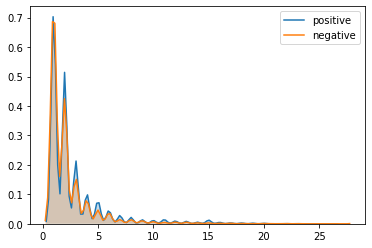

In [39]:
sns.kdeplot(tweet.loc[tweet['sentiment']=='Positive','len_hash_tag'],shade=True,label='positive') #distribution of positive tweets
sns.kdeplot(tweet.loc[tweet['sentiment']=='Negative','len_hash_tag'],shade=True,label='negative') #distribution of negative tweets


In [40]:
tweet['len_text'].describe() #spread of the tweets length

count    39239.000000
mean     61.694921   
std      42.232733   
min      0.000000    
25%      29.000000   
50%      52.000000   
75%      86.000000   
max      233.000000  
Name: len_text, dtype: float64

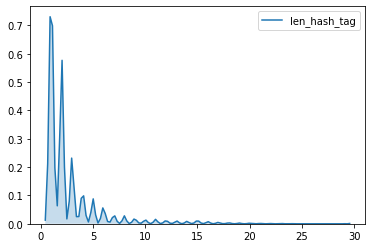

In [41]:
sns.kdeplot(tweet['len_hash_tag'],shade=True) #distribution of hash tag length

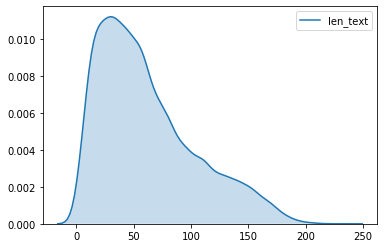

In [42]:
sns.kdeplot(tweet['len_text'],shade=True) #distribution of tweets length

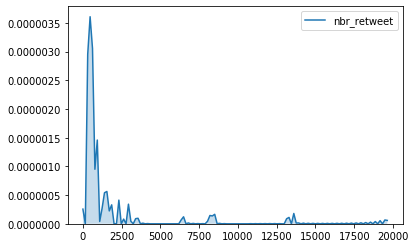

In [43]:
sns.kdeplot(tweet['nbr_retweet'],shade=True) #distribution of retweet nos

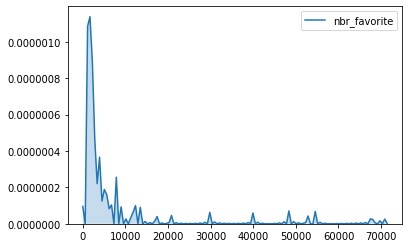

In [44]:
sns.kdeplot(tweet['nbr_favorite'],shade=True)  #Distribution of favorite nos

In [45]:
sample=tweet.sort_values('hour',axis=0, ascending=True, inplace=False) 

#sorting the dateframe in acsending order with respect to hour 

In [46]:
sample['hour'].value_counts()

7.0     2221
21.0    2110
1.0     2057
0.0     2055
22.0    2050
8.0     2039
23.0    2038
2.0     2004
6.0     1997
20.0    1992
3.0     1777
19.0    1776
18.0    1746
4.0     1630
17.0    1514
5.0     1477
9.0     1358
16.0    1273
10.0    1198
15.0    1143
11.0    982 
12.0    947 
13.0    932 
14.0    923 
Name: hour, dtype: int64

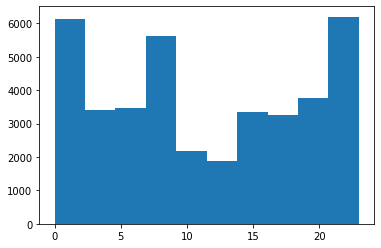

In [47]:
plt.hist(sample['hour']) #time in which tweets are tweeted
plt.show()

#we can se that more people start tweeting after 5'oclk and the trend continues till 2 in the morning
#By afternoon we can see only less people are actively tweeting

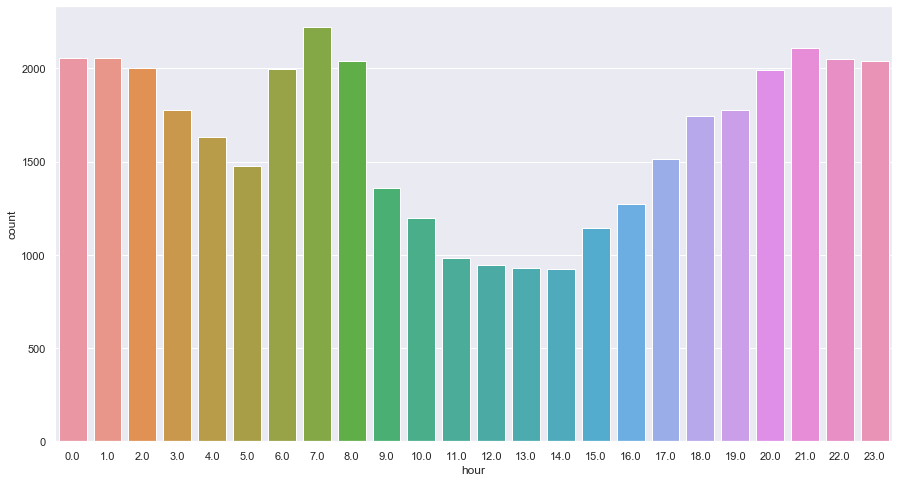

In [48]:
sns.set(style='darkgrid')
rcParams['figure.figsize'] = 15,8
ax=sns.countplot(x='hour',data=sample) #normally people are tweeting after 3 o'clk in the evening 
#highest number of tweets are tweeted by morning 7 o'clk

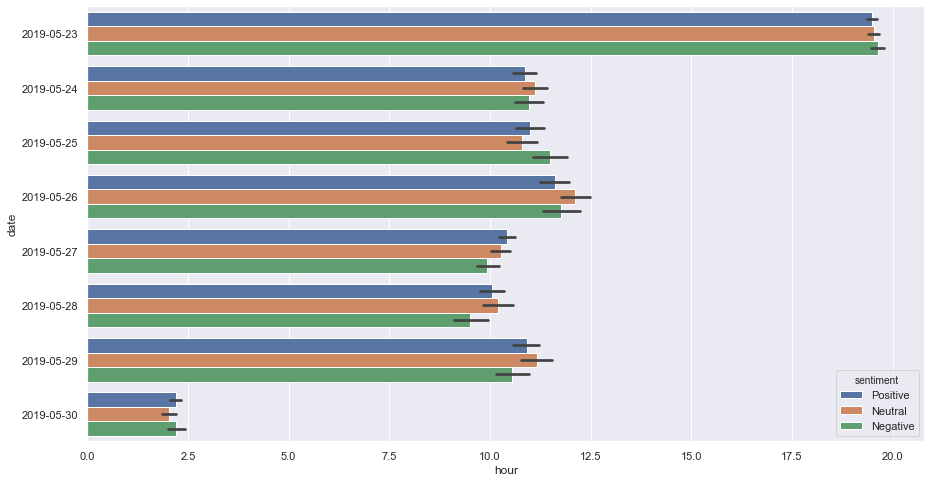

In [49]:
sns.barplot(y='date',x='hour',hue='sentiment',data=tweet) #as the days moves on people started to tweet on midnight

In [50]:
x1 = tweet.loc[tweet.sentiment=='Positive', 'date']      #dates in which positive tweets are tweeted
x2 = tweet.loc[tweet.sentiment=='Negative', 'date']      #dates in which negative tweets are tweeted


(array([ 810., 1701., 1130.,    0., 1062., 2240.,    0., 1131., 1109.,
         209.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

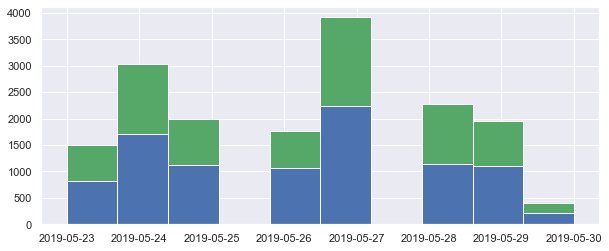

In [51]:
plt.figure(figsize=(10,4))
plt.hist(x1, color='g', label='Positive')
plt.hist(x2, color='b', label='Negative')

#it has more positive reviews in any days than negative tweets


## Function to extract all the hashtags from the tweet

In [52]:
tags=[]
def hash_tag(string):
    hash_tags=re.findall('#[a-z]+|# [a-z]+',string.lower()) #regex to extract all hashtags
    tags.append(hash_tags)
    return(' '.join(hash_tags))

In [53]:
tweet['hash_tag']=tweet.apply(lambda row:hash_tag(row['text']),axis=1)

## converting all the hashtags into a list , so it will be easy to see

In [54]:
List_tags=[]
temp=' '.join(str(' '.join(str(item.replace(' ','')) for item in tokens)) for tokens in tags) 
#takes all the hashtags from dataframe clear all the spaces and the convert them to a string
List_tags=temp.split(' ')


In [55]:
def commontag(words):
    freq_counter=Counter(words)                      # counts the hashtags
    top_words=freq_counter.most_common(15)           # top 15 hashtags
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]      # returns the hastag word
    data['freq']=[val[1] for val in top_words]       # returns the frequency of the hashtag in the tweets
    sns.barplot(y='words',x='freq',data=data)

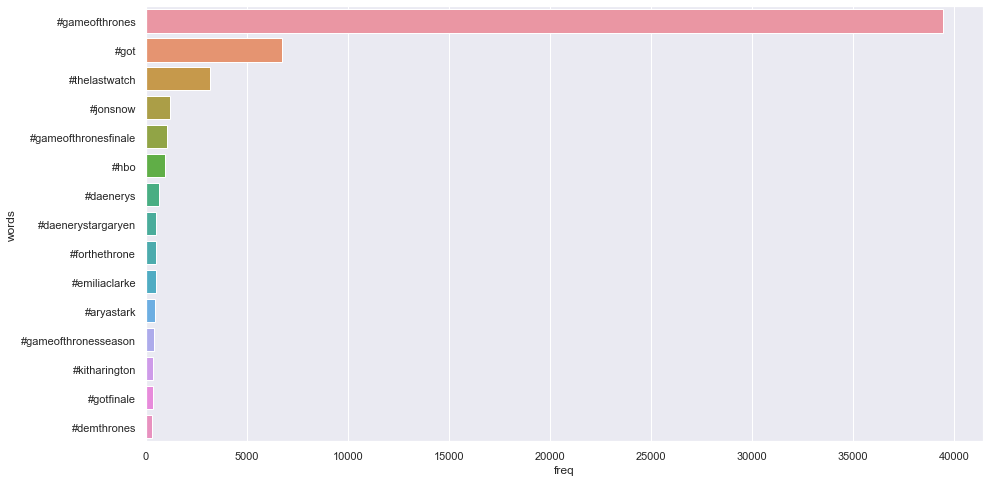

In [56]:
commontag(List_tags)              #calling the function

## Generating wordcloud to visualize the Cleaned tweets

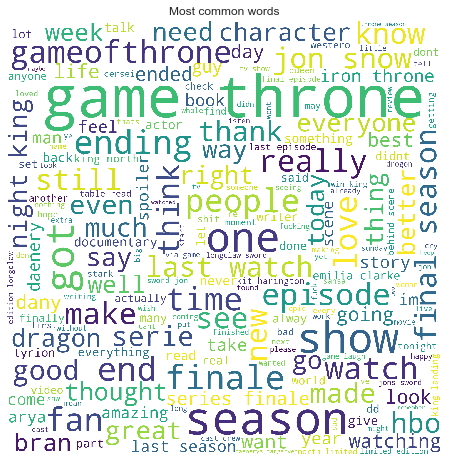

In [57]:
from wordcloud import WordCloud
wordcloud = WordCloud(height=2000, width=2000, background_color='white')
wordcloud = wordcloud.generate(' '.join(tweet['cleaned_text'].tolist())) #converts the dataframe into a list and generates the wordcloud
plt.imshow(wordcloud)
plt.title("Most common words")
plt.axis('off')
plt.show()

In [58]:
positive_reviews=tweet.loc[tweet['sentiment']=='Positive','cleaned_text'].tolist()#list of positive reviews
negative_reviews=tweet.loc[tweet['sentiment']=='Negative','cleaned_text'].tolist()#list of negative reviews

In [59]:
def commonwords(review,top=30):
    reviews=" ".join(review)
    tokenised_reviews=reviews.split(" ")
    
    
    freq_counter=Counter(tokenised_reviews) #counts the occurance
    return freq_counter.most_common(top)

In [60]:
top_30_positive_review_words=commonwords(positive_reviews,30) #top 30 positive reviews

In [61]:
top_30_negative_review_words=commonwords(negative_reviews,30) #top 30 negative reviews

In [62]:
def plotCommonWords(reviews,top=50,title="Positive Review",color="blue",axis=None):
    top_words=commonwords(reviews,top=top)
    data=pd.DataFrame()
    data['words']=[val[0] for val in top_words]
    data['freq']=[val[1] for val in top_words]
    if axis!=None:
        sns.barplot(y='words',x='freq',data=data,color=color,ax=axis).set_title(title+" top "+str(top))
    else:
        sns.barplot(y='words',x='freq',data=data,color=color).set_title(title+" top "+str(top))

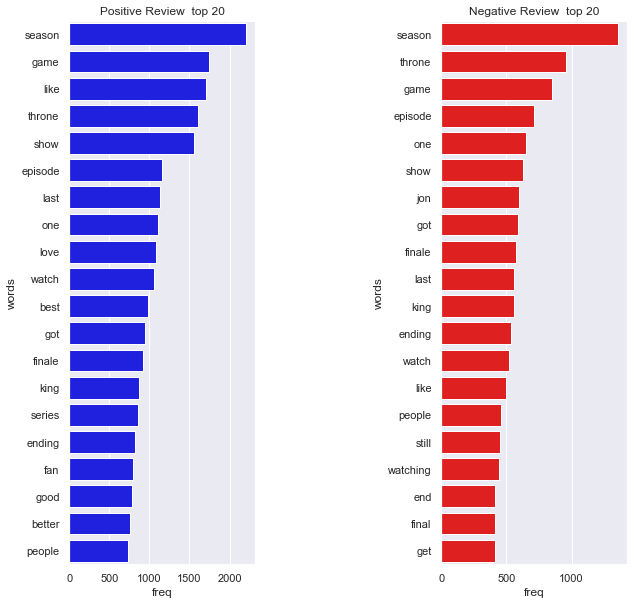

In [63]:
rcParams['figure.figsize'] = 10,10
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotCommonWords(positive_reviews,20,"Positive Review ",axis=ax[0])

plotCommonWords(negative_reviews,20,"Negative Review ",color="red",axis=ax[1])

In [64]:
def generateNGram(text,n=2):  #bigram
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams] #joins two consecutive words

In [65]:
positive_tweets_bigrams=[" ".join(generateNGram(review)) for review in positive_reviews] #positive  bigrams
negative_tweets_bigrams=[" ".join(generateNGram(review)) for review in negative_reviews] #negative bigrams

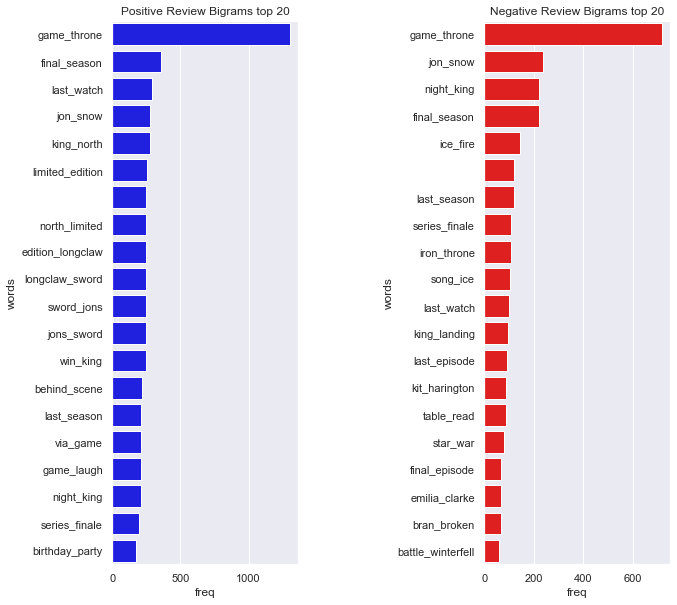

In [66]:
rcParams['figure.figsize'] = 10,10
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=1) #Adjusts the space between the two plots
plotCommonWords(positive_tweets_bigrams,20,"Positive Review Bigrams",axis=ax[0])

plotCommonWords(negative_tweets_bigrams,20,"Negative Review Bigrams",color="red",axis=ax[1])

In [67]:
def generatetriGram(text,n=3): #trigrams
    tokens=text.split(" ")
    ngrams = zip(*[tokens[i:] for i in range(n)])
    return ["_".join(ngram) for ngram in ngrams] #joins consecutive three words

In [68]:
positive_tweets_trigrams=[" ".join(generatetriGram(review)) for review in positive_reviews] #positive trigrams
negative_tweets_trigrams=[" ".join(generatetriGram(review)) for review in negative_reviews] #negative trigrams

C:\Users\VIJESH\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 24417 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\VIJESH\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 24417 missing from current font.
  font.set_text(s, 0, flags=flags)


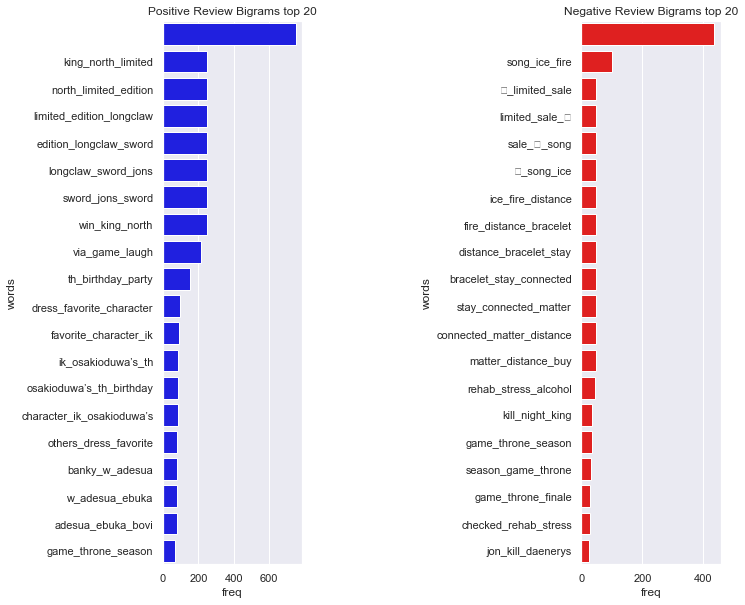

In [69]:
rcParams['figure.figsize'] = 10,10
fig,ax=plt.subplots(1,2)
fig.subplots_adjust(wspace=2) #Adjusts the space between the two plots
plotCommonWords(positive_tweets_trigrams,20,"Positive Review Bigrams",axis=ax[0])

plotCommonWords(negative_tweets_trigrams,20,"Negative Review Bigrams",color="red",axis=ax[1])

## Topic Modelling

In [70]:
def preprocess(row):
    result = []
    text=row['cleaned_text']
    for token in gensim.utils.simple_preprocess(text): 
        if len(token) > 3:                              #only for the text whose length is greater than 3
            #print(token)
            result.append(token)
    return result

In [71]:
pre_text=tweet.apply(lambda row:preprocess(row),axis=1)

In [72]:
dictionary = gensim.corpora.Dictionary(pre_text)

dictionary.filter_extremes(no_below=50, no_above=0.5, keep_n=100000)
# less than 50 documents (absolute number) or
# more than 0.5 documents (fraction of total corpus size, not absolute number).
# after the above two steps, keep only the first 100000 most frequent tokens.


bow_corpus = [dictionary.doc2bow(doc) for doc in pre_text]

bow_=[bow_corpus[i] for i in range(len(bow_corpus)) if len(bow_corpus[i])>25]   # length of the word more than 25

In [73]:
for j in range(len(bow_)):
    print('\n document',j,'\n')
    for i in range(len(bow_[j])):
        bow_1=bow_[j]
        print("Word {} (\"{}\") appears {} time.".format(bow_1[i][0],dictionary[bow_1[i][0]],bow_1[i][1])) 
        #prints the word and how much time they accured in the document

In [74]:
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')

# apply transformation
tf = vectorizer.fit_transform(tweet['cleaned_text']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

In [75]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 5

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0) #model is our LDA algorithm model object

In [76]:
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

## Function to Returns a dataframe, to show you the topics we created

In [77]:
def display_topics(model, feature_names, no_top_words):
    topic_dict = {}
    for topic_idx, topic in enumerate(model.components_):
        topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
        topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
                        for i in topic.argsort()[:-no_top_words - 1:-1]]
    return pd.DataFrame(topic_dict)                       #each topic is a list of words/tokens and weights

                    

In [78]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,scene,565.4,throne,2614.7,king,1860.6,show,2118.9,’s,2391.2
1,emilia,521.2,episode,2612.0,throne,1221.8,season,1936.4,’t,1541.3
2,documentary,506.5,season,2510.5,game,1215.9,ending,1204.0,jon,956.0
3,tonight,470.2,game,2463.1,night,961.3,people,1063.9,like,845.1
4,death,463.8,last,1226.0,north,694.2,watching,1062.7,character,824.7
5,’,416.9,watch,1197.0,queen,666.2,like,1040.0,one,704.6
6,finale,414.6,final,1091.7,dragon,612.2,much,987.5,know,694.0
7,last,377.3,finale,971.4,sword,600.2,watch,975.9,dany,624.0
8,star,365.0,new,733.1,bran,600.1,got,936.1,it,620.4
9,gameofthrones,361.8,week,638.5,snow,575.0,still,870.7,i,540.0


### top words are throne,king, show  as we already know that the tweets are about game of thrones it does not give any insights
### we can add these words to stopwords and we can try to find meaningful insights

## K-means Clustering

In [79]:
documents=tweet['cleaned_text']
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

true_k = 3 #no of clusters
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

print("Top terms per cluster:\n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print("Cluster %d:" % i,'\n'),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print('\n')

print("\n")



Top terms per cluster:

Cluster 0: 

 season
 final
 episode
 watch
 watching
 documentary
 got
 finale
 better
 like


Cluster 1: 

 game
 throne
 laugh
 season
 iron
 watch
 episode
 finale
 fan
 ending


Cluster 2: 

 watch
 king
 like
 episode
 finale
 got
 ending
 watching
 jon
 love




